# <span style ='color:red'>GENRATING DATA WITH NOISE AND MULITIPLE FILE HANDLING

### Noisy data are data that is corrupted, distorted, or has a low Signal-to-Noise Ratio. Improper procedures (or improperly-documented procedures) to subtract out the noise in data can lead to a false sense of accuracy or false conclusions. Data = true signal + noise.

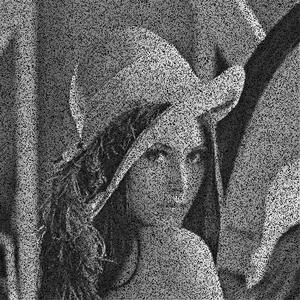

### <span style ='color:red'>importing importanat libraries for ploting grafh </span>

In [2]:
import matplotlib.pyplot as plt  # for ploting graph 
import numpy as np
from scipy.optimize import curve_fit  # curve fiting


### <span style ='color:red'> def function with 3 parameter ,used for curve fitting </span>

In [3]:
def func(x,a,b,c):               #?
    return (a*np.exp(-b*x) + c)


### <span style ='color:red'>genrating data with noise </span>

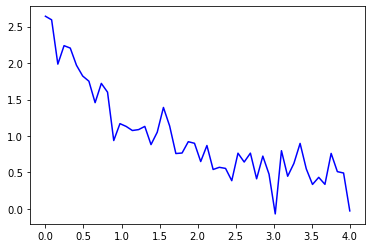

In [4]:
x_data = np.linspace(0, 4, 50)
y = func(x_data, 2.5, 1.3, 0.5)

rng = np.random.default_rng()        #noise genration  (gosion noise)    ?

y_noise = 0.2 *rng.normal(size = x_data.size)  #gosion noise converted into normal noise by multipying 0.2   ?
y_data = y + y_noise
# noise used as carrer signal 
plt.plot(x_data, y_data, 'b-' ,label = 'genrated data');




### <span style ='color:red'> curve fitting </span>

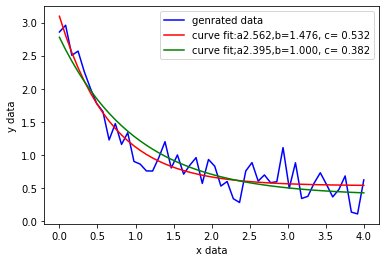

In [5]:
x_data = np.linspace(0, 4, 50)
y = func(x_data, 2.5, 1.3, 0.5)

rng = np.random.default_rng()        #noise genration  (gosion noise)

y_noise = 0.2 *rng.normal(size = x_data.size)  #gosion noise converted into normal noise by multipying 0.2
y_data = y + y_noise

plt.plot(x_data, y_data, 'b-' ,label = 'genrated data');


# now curve fiting
popt, pcov = curve_fit(func, x_data, y_data)            #curve fit function take 3 parameter
plt.plot(x_data, func(x_data, *popt),'r-', label='curve fit:a%5.3f,b=%5.3f, c= %5.3f' %tuple(popt)) #3f= how many digit comes after the decimal


popt, pcov = curve_fit(func, x_data, y_data, bounds = (0,[3.0, 1.0, 0.5]))
plt.plot(x_data, func(x_data, *popt),'g-', label='curve fit;a%5.3f,b=%5.3f, c= %5.3f' %tuple(popt))

plt.xlabel('x data')
plt.ylabel('y data')
plt.legend()
plt.show()

<span style ='color:red'> red =curve fitting line </span>
<span style ='color:green'> green = bond fitting</span>
<span style ='color:blue'> blue=data with noise</span>

### <span style ='color:red'>gaussian curve fitting </span>

### The gauss method is used to get a floating value chosen from a Gaussian or normal distribution with the given mean and standard deviation.


### What is normal or Gaussian distribution?
#### When we plot a dataset such as a histogram, the shape of that charted plot is what we call its distribution. 
#### The most commonly observed shape of continuous values is the bell curve, also called the Gaussian or normal distribution.

In [38]:
x = np.arange(10)
y = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1])

mean = sum(x * y)/ sum(y)
sigma = np.sqrt(sum(y* (x -mean)**2)/ sum (y))


### <span style ='color:red'> def gausian function </span>

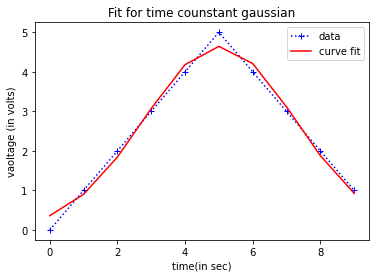

In [44]:
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x-x0)**2 / (2* sigma **2))

popt,pcov = curve_fit(gauss, x, y, p0 = [max(y),mean,sigma])

plt.plot(x,y, 'b+:',label='data')
plt.plot(x, gauss(x,* popt),'r-', label='curve fit')
plt.legend()
plt.title('Fit for time counstant gaussian')
plt.xlabel('time(in sec)')
plt.ylabel ('vaoltage (in volts)')
plt.show()


<span style ='color:red'> CONCLUSION:
<span style ='color:red'>- WITH TIME VOLTAGE INCRESES UPTO THE 5 SEC SHARPLY, AFTER THAT IT DECRESES SHAPLY.
<span style ='color:red'>- THAT VOLTAGE AND TIME DIRECTLY PROPOTION TO THE TIME AFTER BREACK DOEN VOLTAGE IT DECRESES SHARPLY

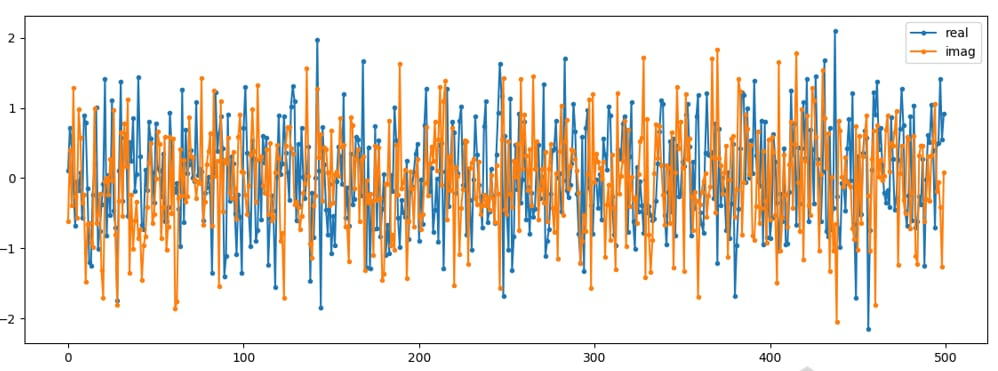

## <span style ='color:red'>single file handling  </span>
### <span style ='color:red'> lognorm function </span>

### A log-normal distribution results if a random variable is the product of a large number of independent, identically-distributed variables in the same way that a normal distribution results if the variable is the sum of a large number of independent, identically-distributed variables.

In [45]:
def lognorm(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)* sigma*x)*np.exp(-(np.log(x)-mu**2)/(2*sigma**2))


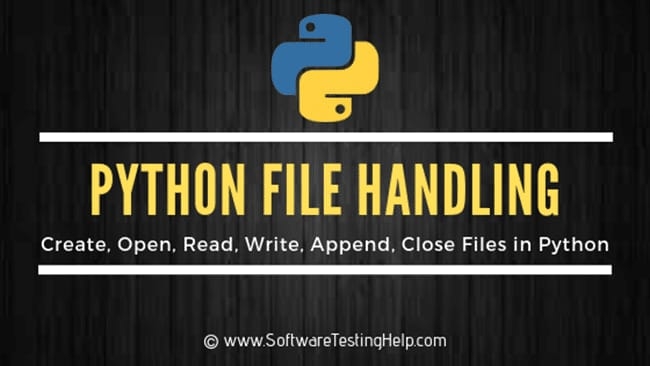

### <span style ='color:red'> loading single file </span>

In [51]:
data = np.loadtxt('file_0.txt')          #by directory 
x,y = data[ :, 0], data[ :, 1]

#### <span style ='color:red'>FILE CONTain instrument data which contain rafio signal, in which there are two columan one contain time in ns and other contain intenity of cosmic rays which strike </span>

In [52]:
x

array([264., 265., 266., 267., 268., 269., 270., 271., 272., 273., 274.,
       275., 276., 277., 278., 279., 280., 281., 282., 283., 284., 285.,
       286., 287., 288., 289., 290., 291., 292., 293., 294., 295., 296.,
       297., 298., 299., 300., 301., 302., 303., 304., 305., 306., 307.,
       308., 309., 310., 311., 312., 313., 314., 315., 316., 317., 318.,
       319., 320., 321., 322., 323., 324., 325., 326., 327., 328., 329.,
       330., 331., 332., 333., 334., 335., 336., 337., 338., 339., 340.,
       341., 342., 343., 344., 345., 346., 347., 348., 349., 350., 351.,
       352., 353., 354., 355., 356., 357., 358., 359., 360., 361., 362.,
       363., 364., 365., 366., 367., 368., 369., 370., 371., 372., 373.,
       374., 375., 376., 377., 378., 379., 380., 381., 382., 383.])

In [53]:
y

array([ 8.000e-01,  1.000e+00,  6.000e-01,  8.000e-01, -7.000e-01,
        3.000e-01,  1.000e+00,  1.000e+00,  1.500e+00,  1.500e+00,
        1.300e+00,  1.300e+00,  2.300e+00,  1.800e+00,  1.300e+00,
        1.000e+00,  2.300e+00,  6.000e-01,  1.800e+00,  1.300e+00,
       -2.000e-01,  3.000e-01,  1.000e+00,  3.000e-01,  1.800e+00,
        1.500e+00,  6.000e-01, -9.000e-01,  1.300e+00,  8.000e-01,
        1.000e+00, -1.600e+00,  1.300e+00,  3.000e-01,  8.000e-01,
        1.000e+00,  1.000e-01,  8.000e-01,  1.000e-01,  6.000e-01,
        1.000e+00,  1.800e+00,  4.700e+00,  9.800e+00,  1.810e+01,
        1.860e+01,  2.740e+01,  4.400e+01,  5.740e+01,  6.670e+01,
        7.670e+01,  9.110e+01,  1.019e+02,  1.063e+02,  1.153e+02,
        1.185e+02,  1.207e+02,  1.231e+02,  1.238e+02,  1.229e+02,
        1.221e+02,  1.199e+02,  1.165e+02,  1.129e+02,  1.082e+02,
        1.065e+02,  1.014e+02,  9.750e+01,  9.280e+01,  8.870e+01,
        8.480e+01,  7.990e+01,  7.600e+01,  7.140e+01,  6.820e

### <span style ='color:red'> curve fiting</span>

In [49]:
popt, _ =curve_fit(lognorm,x,y)
mu, sigma = popt

In [33]:
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x-x0)**2 / (2* sigma **2))

In [34]:
x1 = np.array(x)
n = len (x1)
mean = sum(x*y)/sum(y)
sigma = np.sqrt(sum(y* (x -mean)**2)/ sum (y))
print(mean, sigma)

popt,pcov = curve_fit(gauss, x, y, p0 = [1,mean,sigma])



345.3212747631352 15.06153396294031


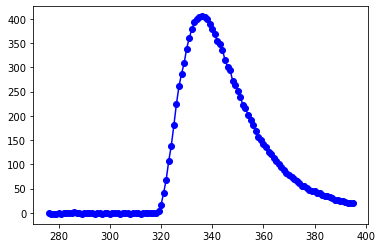

In [35]:
plt.plot(x,y, 'ob-',label='our data');

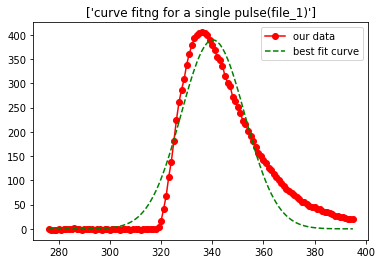

In [37]:
plt.plot(x,y, 'ro-' ,label='our data');
plt.plot(x, gauss(x, *popt), 'g--', label= 'best fit curve')
plt.legend()
plt.title(['curve fitng for a single pulse(file_1)'])
plt.show()

<!-- multiple file handling -->


### <span style ='color:red'> multiple file handling

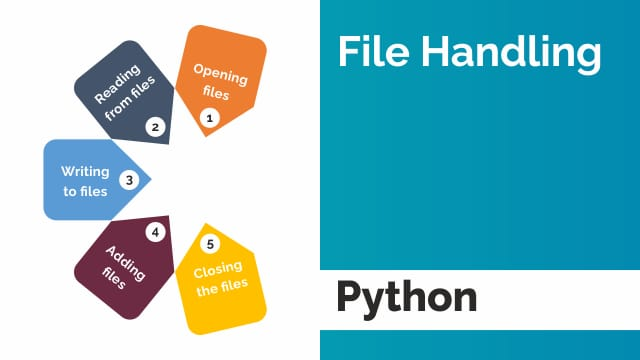

In [73]:
pwd

'C:\\Users\\Rushi'

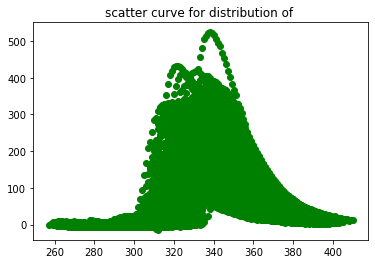

In [78]:
mypath = 'C:/Users/Rushi/Desktop/Mini Project Data'
import os

os.chdir(mypath)
x =list()
y = list()
tmax2 = list()
tmin2 =list()
filname = list()
rise = list()
decay=list()

for i  in range(0,101):
    filname.append('file_'+str(i)+'.txt')
for a in filname:
    temp = list()
    for b in open(a):
        temp = b.split()
        x.append(float(temp[0]))
        y.append(float(temp[1]))

for i in range (0, len(x)-1):
    smallest = i
    for  j in range(i +1,len(x)):
        if x[j] < x[smallest]:
            smallest = j
x[i], x[smallest]= x[smallest],x[i]
y[i], y[smallest] = y[smallest],y[i]
print()
plt.scatter(x ,y ,color='g')
plt.title('scatter curve for distribution of ')
        
plt.show()
    

    

### <span style ='color:red'>CONLUSION:</span>
<span style ='color:red'>- WITH MNI PEOJECT WE UNDESTAND HOW TO HANDLE DATAD SINGLE FILE AND MULTIPLE FILE WITH THERE CURVE FITTING </span>
<span style ='color:red'>- GENRATING NOISE </span>